# Web Coverage Service (WCS)


This notebook demonstrate how to use the Open Geospatial Consortium (OGC) Web Coverage Service (WCS) protocol through NCI's THREDDS data server.

- Web Coverage Service (WCS)
- Constructing WCS GetCoverage Requests
- Extra exercise: Verifying request with GDAL in Python
---

- Authors: NCI Virtual Research Environment Team
- Keywords: THREDDS, OGC, WMS
- Create Date: 2019-Jul

---
This notebook is licenced under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/)


### Web Coverage Service (WCS)

NCI's THREDDS Data Server supports [OGC's Web Coverage Service (WCS)](http://www.opengeospatial.org/standards/wcs) for gridded data collections. WCS provides a standard interface for how to request the raster source of a geospatial image. The WCS service allows users to request data or subsets of data in either NetCDF, GeoTIFF, or GeoTIFF-float format. The results of a WCS allows more complex querying - you can extract just the portion of the coverage that you require.

### Constructing `GetCoverage` Requests

To extract data through the Web Coverage Service, a `GetCoverage` URL request needs to be constructed. The GetCoverage request is similar to a WMS GetMap request, but with several extensions to support the retrieval of coverages. 

<div class="alert alert-warning">
<b>NOTE:</b> The following examples show the WCS 1.0 protocol. The full specification for versions 1.0, 1.1 and 2.0 are available on the OGC web site: http://www.opengeospatial.org/standards/wcs.
</div>

**The request takes the following form:**

> `http://dapds00.nci.org.au/thredds/wcs/<thredds-path-to-data-file>?`<FONT COLOR="red">service</FONT>=WCS&<FONT COLOR="red">version</FONT>=1.0.0&<FONT COLOR="red">request</FONT>=GetCoverage&<FONT COLOR="red">coverage</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="red">format</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">bbox</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">time</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">crs</FONT>=<FONT COLOR="#00cc99">value</FONT>value

where <FONT COLOR="red">red</FONT> indicates required fields, <FONT COLOR="blue">blue</FONT> are optional, and <FONT COLOR="00cc99">green</FONT> are where inputs values relevant to the dataset and user request need to be defined. 

The `GetCoverage` operation can retrieve subsets of coverages, and the result can be either the coverage itself or a reference to it. The most powerful thing about a GetCoverage request is its ability to subset domains (height and time) and ranges. It can also do resampling, encode in different data formats, and return the resulting file in different formats.

**GetCoverage parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WCS                                                          |
|version      |     Required        |  `1.0.0`                                                          |
|request      |     Required        | `GetCoverage`                                                     |
|coverage     |     Required        | `<variable>`                                                      |
|format       |     Required        | `GeoTIFF  `, `GeoTIFF_Float  `, `NetCDF3  `                       |
|bbox`*`         |     Required/Optional        | `<xmin,ymin,xmax,ymax>`                                           |
|time`*`         |     Required/Optional        | `<time_value>`                                                    |
|srs, or crs  |     Optional        | `<srs_value>` or `<crs_value>`                                    |

`*`For large files and/or files with a time dimension, these might be necessary. If `bbox` is not defined the entire spatial domain will be returned (if server limits allow) and if `time` is not specified, either the first or sometimes last timestep is returned. 

Once providing the appropriate values for the dataset, a URL can now be generated that will return the requested coverage (in this example the output is returned in the GeoTIFF format:

>http://dapds00.nci.org.au/thredds/wcs/rs0/datacube/002/LS8_OLI_NBART/-10_-11/LS8_OLI_NBART_3577_-10_-11_20160109015321000000.nc?service=WCS&version=1.0.0&request=GetCoverage&coverage=nir&format=GeoTIFF&time=2016-01-09T01:53:21Z

When selecting or inputing this URL into a web browser, a file download should commence.


Where to find the valid input values?

The WCS link on NCI's THREDDS catalog page will retrieve a WCS `GetCapabilities` request. This provides a list of the valid WCS operations and parameters, which can be helpful in constructing `GetCoverage` requests. If the `request=` option in the URL is changed to `DescribeCoverage`, additional information can be found. 

Start by selecting a desired file from the NCI THREDDS Catalog page: 

http://dapds00.nci.org.au/thredds/catalog/rs0/datacube/002/LS8_OLI_NBART/-10_-11/catalog.html?dataset=LS8_OLI_NBART/-10_-11/LS8_OLI_NBART_3577_-10_-11_20160109015321000000.nc

![](images/thredds13.png)

Then by selecting the **WCS** link:

![](images/thredds14.png)

This will display the `GetCapabilities` page:

![](images/thredds15.png)



> **GetCapabilities example:**

>http://dapds00.nci.org.au/thredds/wcs/rs0/datacube/002/LS8_OLI_NBAR/-10_-11/LS8_OLI_NBAR_3577_-10_-11_20160109015321000000.nc?service=WCS&version=1.0.0&request=GetCapabilities



> **DescribeCoverage example:**

>http://dapds00.nci.org.au/thredds/wcs/rs0/datacube/002/LS8_OLI_NBAR/-10_-11/LS8_OLI_NBAR_3577_-10_-11_20160109015321000000.nc?service=WCS&version=1.0.0&request=DescribeCoverage




### Extra: Let's verify the request using GDAL

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt 
%matplotlib inline

**Open/extract data**

In [2]:
ds = gdal.Open('data/WCS6179871831255733883.tif')
band = ds.GetRasterBand(1).ReadAsArray()

**Plot**

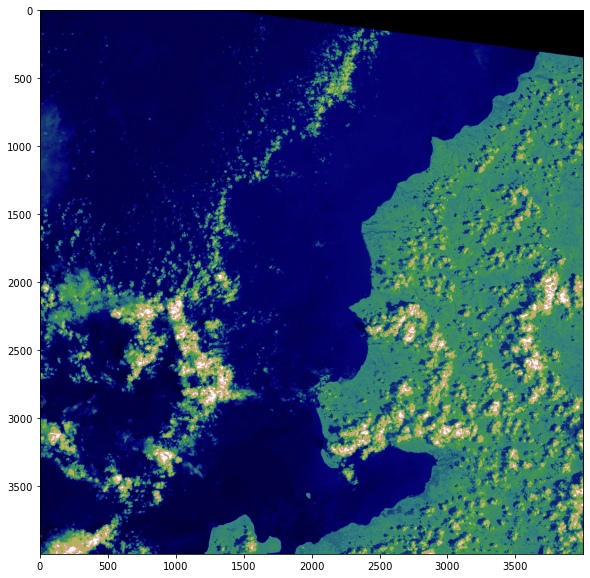

In [3]:
fig = plt.figure(figsize=(10,10))
plt.imshow(band, cmap='gist_earth')

## Reference
**For more information on OGC standards specifications WCS and ncWMS:** 

http://www.opengeospatial.org/standards/wcs 

https://reading-escience-centre.github.io/ncwms/ 
